#**PROJECT :ELECTRICAL VEHICLE ANALYSIS**

 **IMPORTING THE NECESSARY LIBRARIES**

**READING THE DATASET**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)


In [62]:
df=pd.read_csv("/content/dinni (1).csv")

**IMPORTING THE NECESSARY LIBRARIES**

In [63]:
df

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,latitude
0,Thurston,Tumwater,WA,98512,2019,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,220,0,22,242565116,PUGET SOUND ENERGY INC,53067010910,-122.913102,47.013593
1,Island,Clinton,WA,98236,2022,NISSAN,LEAF,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,10,183272785,PUGET SOUND ENERGY INC,53029972000,-122.359364,47.979655
2,Snohomish,Snohomish,WA,98290,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,266,0,44,112552366,PUGET SOUND ENERGY INC,53061052502,-122.091505,47.915555
3,King,Seattle,WA,98134,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,322,0,11,6336319,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033009300,-122.329815,47.579810
4,Snohomish,Edmonds,WA,98020,2013,TESLA,MODEL S,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,208,69900,21,186212960,PUGET SOUND ENERGY INC,53061050403,-122.375070,47.808070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,King,Seatac,WA,98148,2022,TESLA,MODEL 3,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,33,209776591,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033028500,-122.328060,47.461550
9995,King,Woodinville,WA,98072,2021,MINI,HARDTOP,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,110,0,45,123133083,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033021906,-122.151665,47.758550
9996,King,Redmond,WA,98052,2021,TESLA,MODEL 3,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,45,219495965,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033022605,-122.123020,47.676680
9997,Snohomish,Lake Stevens,WA,98258,2018,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,215,0,44,335739708,PUGET SOUND ENERGY INC,53061052505,-122.112065,48.004345


**ANALYSING THE DATASET**

In [ ]:
df.shape

(9999, 17)

In [ ]:
df.columns

Index(['County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type', 'CAFV', 'Electric Range', 'Base MSRP',
       'Legislative District', 'DOL Vehicle ID', 'Electric Utility',
       '2020 Census Tract', 'Longitude', 'latitude'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   County                 9999 non-null   object 
 1   City                   9999 non-null   object 
 2   State                  9999 non-null   object 
 3   Postal Code            9999 non-null   int64  
 4   Model Year             9999 non-null   int64  
 5   Make                   9999 non-null   object 
 6   Model                  9999 non-null   object 
 7   Electric Vehicle Type  9999 non-null   object 
 8   CAFV                   9999 non-null   object 
 9   Electric Range         9999 non-null   int64  
 10  Base MSRP              9999 non-null   int64  
 11  Legislative District   9999 non-null   int64  
 12  DOL Vehicle ID         9999 non-null   int64  
 13  Electric Utility       9999 non-null   object 
 14  2020 Census Tract      9999 non-null   int64  
 15  Long

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9999.0,9.821560e+04,2.606435e+02,9.800100e+04,9.803800e+04,9.811500e+04,9.828200e+04,9.940300e+04
Model Year,9999.0,2.019717e+03,2.992762e+00,2.008000e+03,2.018000e+03,2.021000e+03,2.022000e+03,2.024000e+03
Electric Range,9999.0,7.496170e+01,9.934703e+01,0.000000e+00,0.000000e+00,2.100000e+01,1.500000e+02,3.370000e+02
Base MSRP,9999.0,1.524012e+03,9.920049e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.844000e+05
Legislative District,9999.0,3.134483e+01,1.458915e+01,1.000000e+00,2.000000e+01,3.600000e+01,4.500000e+01,4.900000e+01
DOL Vehicle ID,9999.0,2.047389e+08,8.509909e+07,9.077200e+04,1.590186e+08,2.058916e+08,2.306818e+08,4.789259e+08
2020 Census Tract,9999.0,5.303629e+10,1.432873e+07,5.300195e+10,5.303301e+10,5.303302e+10,5.303303e+10,5.307794e+10
Longitude,9999.0,-1.222075e+02,7.078571e-01,-1.242553e+02,-1.223824e+02,-1.222918e+02,-1.221694e+02,-1.170457e+02
latitude,9999.0,4.742524e+01,6.205192e-01,4.558386e+01,4.743473e+01,4.761385e+01,4.771124e+01,4.899505e+01


**1.Electric Vehicle Adoption Analysis:** Analyze the distribution of electric vehicles across
counties, cities, and states to understand the adoption rate and popularity of electric
vehicles in different regions.

In [ ]:
#Grouping the data by counties, cities
grouped_by_county = df.groupby('County').size()
grouped_by_city = df.groupby('City').size()

#Calculate the adoption rate and popularity of electric vehicles in different counties,cities
total_electric_vehicles = df.shape[0]
adoption_rate_county = grouped_by_county / total_electric_vehicles * 100
adoption_rate_city = grouped_by_city / total_electric_vehicles * 100

In [ ]:
print(adoption_rate_county)


County
Adams            0.020002
Asotin           0.010001
Benton           0.480048
Chelan           0.220022
Clallam          0.390039
Clark            8.170817
Columbia         0.010001
Cowlitz          0.730073
Douglas          0.150015
Ferry            0.010001
Franklin         0.140014
Garfield         0.010001
Grant            0.150015
Grays Harbor     0.170017
Island           0.700070
Jefferson        0.780078
King            64.226423
Kitsap           4.140414
Kittitas         0.170017
Klickitat        0.090009
Lewis            0.350035
Mason            0.210021
Okanogan         0.060006
Pacific          0.030003
Pend Oreille     0.030003
Pierce           3.170317
San Juan         0.210021
Skagit           0.560056
Skamania         0.090009
Snohomish        8.090809
Spokane          1.080108
Stevens          0.040004
Thurston         3.320332
Wahkiakum        0.010001
Walla Walla      0.150015
Whatcom          1.030103
Whitman          0.110011
Yakima           0.690069
dtype

In [ ]:
print(adoption_rate_city)

City
Aberdeen          0.010001
Airway Heights    0.010001
Algona            0.020002
Allyn             0.010001
Amboy             0.010001
                    ...   
Yacolt            0.010001
Yakima            0.450045
Yarrow Point      0.070007
Yelm              0.380038
Zillah            0.030003
Length: 261, dtype: float64


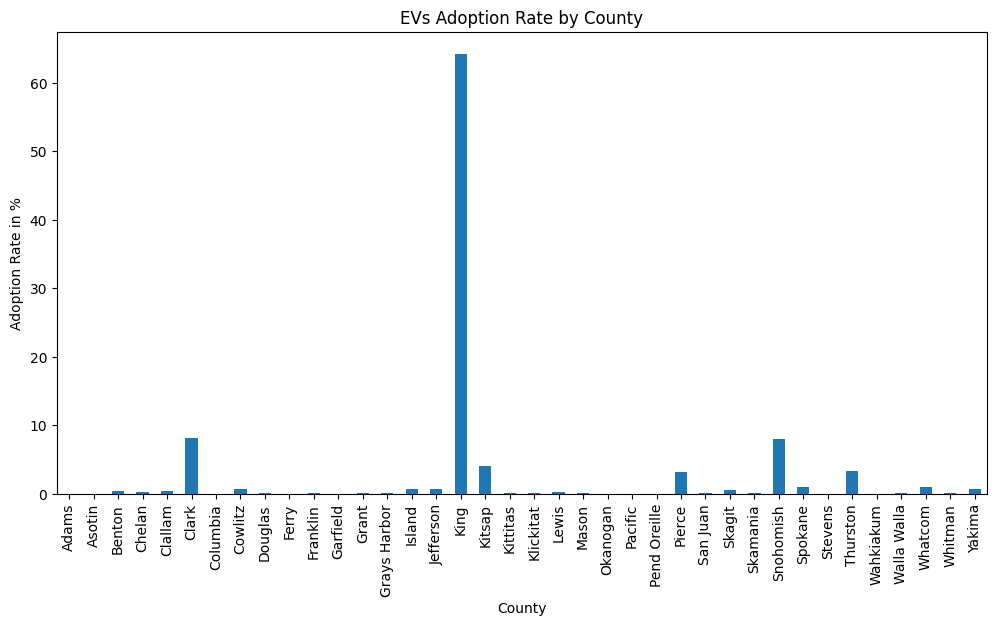

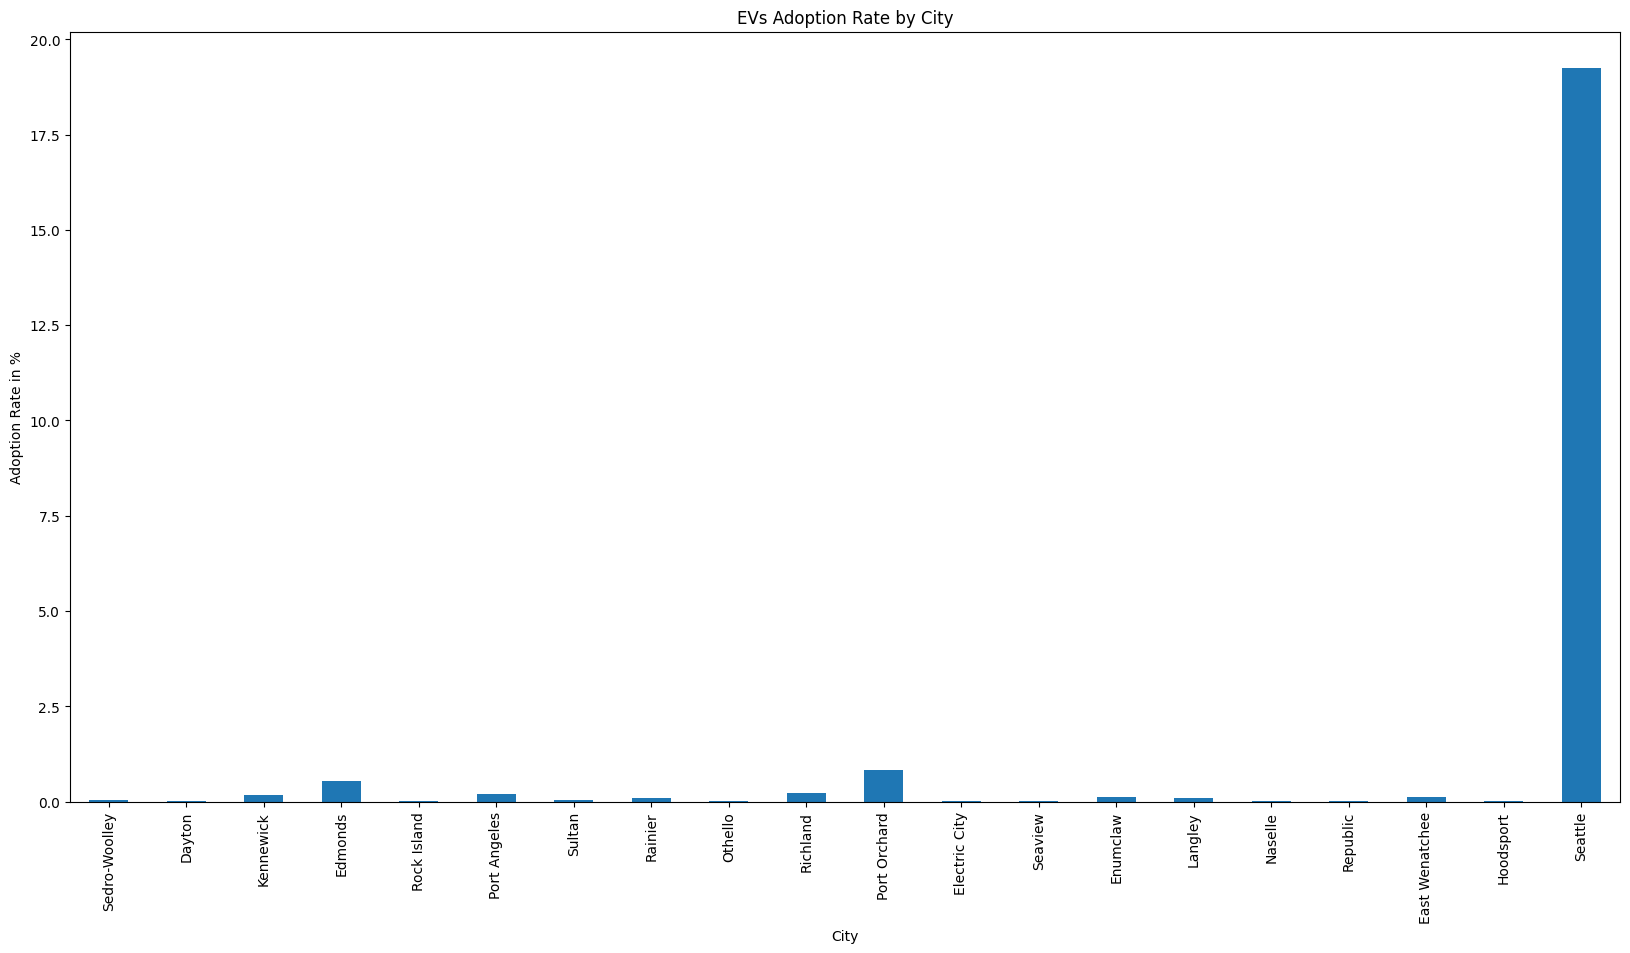

In [ ]:
#Visualize the results
# Plotting adoption rate by county
plt.figure(figsize=(12, 6))
adoption_rate_county.plot(kind='bar')
plt.title('EVs Adoption Rate by County')
plt.xlabel('County')
plt.ylabel('Adoption Rate in %')
plt.xticks(rotation=90)
plt.show()

# Plotting adoption rate by city samples of 20
plt.figure(figsize=(20, 10))
adoption_rate_city.sample(20).plot(kind='bar')
plt.title('EVs Adoption Rate by City')
plt.xlabel('City')
plt.ylabel('Adoption Rate in %')
plt.xticks(rotation=90)
plt.show()


"Analyzing the dataset reveals varying electric vehicle adoption rates across counties, cities, and states, reflecting regional differences in the popularity and acceptance of electric vehicles."

**2.Electric Vehicle Types:** Explore the types of electric vehicles (e.g., electric cars, electric
trucks) and their prevalence in the dataset.

In [ ]:
df['Electric Vehicle Type'].unique()
df1=pd.DataFrame(df['Electric Vehicle Type'].value_counts())

In [ ]:
df1

,Electric Vehicle Type
Battery Electric Vehicle,7767
Plug-in Hybrid Electric Vehicle,2232


In [ ]:
import plotly.express as px
fig = px.bar(df1, x='Electric Vehicle Type', title='Count Plot of EV Types')
fig.update_traces(textposition='outside', texttemplate='%{y}', textfont_size=12)
fig.update_traces(textposition='outside', texttemplate='%{y}', textfont_size=12)
fig.show()

"This Plotly Express bar plot visually depicts the count of electric vehicle types, placing the count values outside the bars for clear representation and insight into the distribution of different EV types."

**3.Clean Alternative Fuel Vehicles:** Investigate the usage of clean alternative fuel vehicles and
their distribution across different areas.

In [ ]:
#Extract relevant columns for the analysis
df_cafv = df[['CAFV', 'County', 'City']]

# Step 4: Analyze the distribution of clean alternative fuel vehicles
cafv_vehicle_counts = df_cafv['CAFV'].value_counts()
cafv_vehicle_percentages = cafv_vehicle_counts / len(df_cafv) * 100

# Display the distribution of clean alternative fuel vehicles
print("CAFV Distribution:")
print(cafv_vehicle_percentages)

CAFV Distribution:
Clean Alternative Fuel Vehicle Eligible                         45.084508
Eligibility unknown as battery range has not been researched    42.534253
Not eligible due to low battery range                           12.381238
Name: CAFV, dtype: float64


In [ ]:
import plotly.express as px

# Assuming you have already loaded the DataFrame and extracted relevant columns
# df_cafv = df[['CAFV', 'County', 'City']]

# Step 4: Analyze the distribution of clean alternative fuel vehicles
cafv_vehicle_counts = df_cafv['CAFV'].value_counts()
cafv_vehicle_percentages = cafv_vehicle_counts / len(df_cafv) * 100

# Convert the distribution data to a DataFrame for plotting with Plotly Express
cafv_distribution = pd.DataFrame({'Vehicle Type': cafv_vehicle_percentages.index, 'Percentage': cafv_vehicle_percentages.values})

# Create a bar plot using Plotly Express
fig = px.bar(cafv_distribution, x='Vehicle Type', y='Percentage',
             title='Distribution of Clean Alternative Fuel Vehicles',
             labels={'Vehicle Type': 'Vehicle Type', 'Percentage': 'Percentage'},
             color_continuous_scale='cividis')

# Customize the x-axis labels
fig.update_xaxes(tickangle=-45, tickfont=dict(size=10))

# Show the interactive plot
fig.show()


"This Plotly Express bar plot visually represents the distribution of clean alternative fuel vehicles by type, showcasing their percentage presence using a color-coded scheme for enhanced understanding."

**4. Legislative District Impact:** Analyze how legislative districts influence electric vehicle
adoption and clean alternative fuel vehicle usage.

In [ ]:
#Extract relevant columns for the analysis
df_legislative = df[['Legislative District', 'CAFV', 'Electric Vehicle Type']]

#Analyzing EV adoption and CAFV usage in each legislative district
district_vehicle_counts = df_legislative.groupby('Legislative District').size()
district_cafv_counts = df_legislative[df_legislative['CAFV'] == 'Yes'].groupby('Legislative District').size()
district_ev_counts = df_legislative[df_legislative['Electric Vehicle Type'] == 'Electric Car'].groupby('Legislative District').size()

In [ ]:
print(district_vehicle_counts)
print(district_cafv_counts)
print(district_ev_counts)

Legislative District
1     434
2      82
3      27
4      26
5     319
6      41
7      22
8      40
9      29
10    107
11    468
12     42
13     31
14     52
15     38
16     26
17    250
18    366
19     45
20    105
21    190
22    190
23    279
24    134
25     47
26    144
27     67
28     45
29     27
30     94
31     84
32    308
33    376
34    298
35    126
36    421
37    302
38     48
39    103
40     99
41    822
42     55
43    466
44    182
45    813
46    560
47    209
48    775
49    185
dtype: int64
Series([], dtype: int64)
Series([], dtype: int64)


In [ ]:

# Calculate vehicle counts by legislative district
district_vehicle_counts = df['Legislative District'].value_counts()
district_cafv_counts = df[df['CAFV'] == 'Yes']['Legislative District'].value_counts()
district_ev_counts = df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']['Legislative District'].value_counts()

# Create a DataFrame for the stacked bar plot
plot_data = pd.DataFrame({
    'Legislative District': district_vehicle_counts.index,
    'Total Vehicles': district_vehicle_counts,
    'CAFVs': district_cafv_counts,
    'Electric Cars': district_ev_counts
})

# Create a stacked bar plot using Plotly Express
fig = px.bar(plot_data, x='Legislative District',
             y=['Total Vehicles', 'CAFVs', 'Electric Cars'],
             title='EV Adoption and CAFV Usage by Legislative District',
             labels={'Legislative District': 'Legislative District', 'value': 'Vehicle Count'},
             category_orders={'Legislative District': district_vehicle_counts.index},
             color_discrete_sequence=['#1f77b4', '#ff7f0e', '#2ca02c'],
             opacity=0.7)
fig.update_layout(xaxis_tickangle=-45)
fig.show()


"This code calculates and visualizes the distribution of vehicle types, including Total Vehicles, Clean Alternative Fuel Vehicles (CAFs), and Electric Cars, across different legislative districts. The stacked bar plot offers a clear comparison of adoption trends, indicating the prevalence of each vehicle category within specific districts."



**5.Electric Utility Analysis:** Study the association between electric vehicles and the electric
utility providers in different areas.

In [ ]:
import pandas as pd
import plotly.express as px

# Sample data (replace this with your actual dataset)
data = {
    'County': ['County A', 'County B', 'County A', 'County C', 'County B'],
    'City': ['City X', 'City Y', 'City X', 'City Z', 'City Y'],
    'State': ['State 1', 'State 2', 'State 1', 'State 3', 'State 2'],
    'Electric Utility': ['Utility A', 'Utility B', 'Utility A', 'Utility C', 'Utility B'],
    'Electric Vehicle Type': ['BEV', 'PHEV', 'BEV', 'BEV', 'BEV']
}

df = pd.DataFrame(data)

# Calculate vehicle counts by electric utility and vehicle type
utility_vehicle_counts = df.groupby(['Electric Utility', 'Electric Vehicle Type']).size().reset_index(name='Vehicle Count')

# Create a bar plot using Plotly Express
fig = px.bar(utility_vehicle_counts, x='Electric Utility', y='Vehicle Count', color='Electric Vehicle Type',
             title='Electric Vehicle Distribution by Electric Utility',
             labels={'Electric Utility': 'Electric Utility', 'Vehicle Count': 'Vehicle Count'},
             barmode='group')
fig.update_layout(xaxis_tickangle=-45)
fig.show()


 **6.Electric Vehicle Trends:**Explore trends in electric vehicle adoption over model years

In [ ]:
del_cols= ['Longitude', 'latitude', 'Postal Code']
df.drop(columns=del_cols, axis=1, inplace=True)

In [ ]:
#Finding the correation
print(df.corr())

                      Model Year  Electric Range  Base MSRP  \
Model Year              1.000000       -0.397394  -0.252112   
Electric Range         -0.397394        1.000000   0.111203   
Base MSRP              -0.252112        0.111203   1.000000   
Legislative District   -0.025547        0.046747   0.011837   
DOL Vehicle ID          0.009504       -0.043192   0.008928   
2020 Census Tract      -0.046558        0.012963   0.005350   

                      Legislative District  DOL Vehicle ID  2020 Census Tract  
Model Year                       -0.025547        0.009504          -0.046558  
Electric Range                    0.046747       -0.043192           0.012963  
Base MSRP                         0.011837        0.008928           0.005350  
Legislative District              1.000000       -0.016993          -0.120060  
DOL Vehicle ID                   -0.016993        1.000000           0.007908  
2020 Census Tract                -0.120060        0.007908           1.000000 

In [ ]:
# Group the data by model years
grouped_data = df.groupby('Model Year')

#Calculate the count of electric vehicles for each model year
ev_count_for_year = grouped_data['DOL Vehicle ID'].count()

# Displaying the results
print("Electric Vehicle Adoption Trend by Model Year:")
print(ev_count_for_year)

Electric Vehicle Adoption Trend by Model Year:
Model Year
2008       1
2010       4
2011      56
2012     118
2013     343
2014     280
2015     365
2016     395
2017     603
2018     995
2019     769
2020     882
2021    1363
2022    2121
2023    1700
2024       4
Name: DOL Vehicle ID, dtype: int64


In [ ]:
import plotly.express as px
# Grouping the data by model years and calculate the count of electric vehicles for each year
ev_counts_by_year = df.groupby('Model Year').size().reset_index(name='Count')

# Creating a line plot using Plotly Express to visualize the trends in electric vehicle adoption over model years
fig = px.line(ev_counts_by_year, x='Model Year', y='Count',
              title='Electric Vehicle Adoption Trends over Model Years',
              labels={'Model Year': 'Model Year', 'Count': 'Number of Electric Vehicles'})
fig.update_xaxes(tickangle=45)

# Show the interactive plot
fig.show()


 groups the data by model years, calculates the count of electric vehicles for each year, and displays the adoption trend, offering insights into the temporal evolution of electric vehicle popularity."

**8.Electric Vehicle Market Analysis:**Understand the market share of different electric vehicle
makes and models.

In [ ]:
# Grouping the data by electric vehicle makes and calculate the count for each make
make_counts = df.groupby('Make').size().reset_index(name='Count')

# Calculate the total count of electric vehicles
total_count = len(df)

# Calculate the market share for each make
make_counts['Market_Share'] = (make_counts['Count'] / total_count) * 100

# Sort the data by market share in descending order
make_counts.sort_values(by='Market_Share', ascending=False, inplace=True)

# Create a bar plot using Plotly Express to visualize the market share of different electric vehicle makes
fig = px.bar(make_counts, x='Make', y='Market_Share',
             title='Market Share of Electric Vehicle Makes',
             labels={'Make': 'Electric Vehicle Make', 'Market_Share': 'Market Share (%)'},
             width=800, height=400)
fig.update_xaxes(tickangle=45)

# Show the interactive plot
fig.show()


The above plot visualizes the market share of different electric vehicle makes, demonstrating their relative popularity and prominence in the electric vehicle market through a sorted bar plot."

In [ ]:
print(make_counts)

                    Make  Count  Market_Share
28                 TESLA   4731     47.314731
22                NISSAN    986      9.860986
4              CHEVROLET    815      8.150815
8                   FORD    451      4.510451
2                    BMW    433      4.330433
14                   KIA    387      3.870387
29                TOYOTA    342      3.420342
31                 VOLVO    244      2.440244
30            VOLKSWAGEN    236      2.360236
13                  JEEP    224      2.240224
0                   AUDI    202      2.020202
5               CHRYSLER    192      1.920192
11               HYUNDAI    169      1.690169
25                RIVIAN    123      1.230123
6                   FIAT     61      0.610061
24               PORSCHE     58      0.580058
20                  MINI     53      0.530053
10                 HONDA     52      0.520052
23              POLESTAR     51      0.510051
19         MERCEDES-BENZ     49      0.490049
21            MITSUBISHI     44   

In [ ]:
# Create a box plot using Plotly Express with color to visualize the distribution of electric range by make
fig = px.scatter(df, x='Make', y='Electric Range',
             title='Electric Range by Make',
             labels={'Make': 'Make', 'Electric Range': 'Electric Range'},
             color='Make',  # Adding color to distinguish makes
             width=800, height=400)
fig.update_xaxes(tickangle=45)

# Show the interactive plot
fig.show()


This scatter plot depicting the electric range distribution among different vehicle makes, allowing for a quick comparison of electric range variations across various makes."*italicized text*

In [ ]:
import pandas as pd
import plotly.express as px

# Calculate market share by make
make_count = df['Make'].value_counts().reset_index()
make_count.columns = ['Make', 'Values']
make_count = make_count.sort_values(by='Values', ascending=False)

# Select the top N makes for visualization
top = 10
make_count_top = make_count.head(top)

# Create a donut chart using Plotly Express
fig = px.pie(make_count_top, values='Values', names='Make',
             title='Market Share by Make (Top 10)',
             hole=0.4,  # Adjust the hole size for the donut effect
             color_discrete_sequence=px.colors.qualitative.Set3)

# Show the interactive plot
fig.show()


"This donut chart visualises and represents the market share distribution among the top 10 electric vehicle makes, highlighting the dominance of certain makes in the market."

**Electric Vehicle Price Range:**Electric Vehicle Price Range: Determine the price range of electric vehicles and identify
factors influencing pricing.

In [ ]:
#Feature Engineer
# Age
current_year = 2023
df['Car Age'] = current_year - df['Model Year']
df["Car Age"].head()


# Fuel Efficiency
bins = [0, 100, 200, 300, float('inf')]
labels = ['Short Range', 'Medium Range', 'Long Range', 'Very Long Range']

df['Fuel Efficiency'] = pd.cut(df['Electric Range'], bins=bins, labels=labels, right=False)
df['Fuel Efficiency'].head()


# Electric Utility Feature
df['Electric Utility Feature'] = df['Electric Utility'].apply(lambda x: 'Available' if x != 'None' else "Not Available")
df['Electric Utility Feature'].head()


df[["Car Age", "Fuel Efficiency", "Electric Utility Feature"]]

,Car Age,Fuel Efficiency,Electric Utility Feature
0,4,Long Range,Available
1,1,Short Range,Available
2,3,Long Range,Available
3,3,Very Long Range,Available
4,10,Long Range,Available
...,...,...,...
9994,1,Short Range,Available
9995,2,Medium Range,Available
9996,2,Short Range,Available
9997,5,Long Range,Available


In [ ]:
#Extract relevant columns for the analysis
analysis = df[['Make', 'Model', 'Base MSRP', 'Electric Range', 'Electric Vehicle Type', 'Electric Utility']]

#Calculate the price range of electric vehicles
price_range = analysis['Base MSRP'].min(), analysis['Base MSRP'].max()

#Calculate summary statistics for pricing
price_statistics = analysis['Base MSRP'].describe()

#Calculate the correlation between pricing and other factors (if needed)
correlation = analysis.corr()

# Display the results
print("Price Range of Electric Vehicles:")
print(price_range)

print("\nSummary Statistics for Pricing:")
print(price_statistics)

print("\nCorrelation between Pricing and Other Factors:")
print(correlation)

Price Range of Electric Vehicles:
(0, 184400)

Summary Statistics for Pricing:
count      9999.000000
mean       1524.012401
std        9920.048574
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      184400.000000
Name: Base MSRP, dtype: float64

Correlation between Pricing and Other Factors:
                Base MSRP  Electric Range
Base MSRP        1.000000        0.111203
Electric Range   0.111203        1.000000


**Questions**

**Which Year has higher sales**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/dinni (1).csv')

# Group the data by Model Year and Make, then count the unique makes in each year
yearly_make_counts = df.groupby('Model Year')['Make'].nunique()

# Find the year with the highest number of makes
max_make_year = yearly_make_counts.idxmax()

print(f"The year with the highest number of makes is {max_make_year}")


The year with the highest number of makes is 2023


In [ ]:
import plotly.express as px
# Group the data by Model Year and Make, then count the unique makes in each year
yearly_make_counts = df.groupby('Model Year')['Make'].nunique().reset_index()

# Find the year with the highest number of makes
max_make_year = yearly_make_counts[yearly_make_counts['Make'] == yearly_make_counts['Make'].max()]['Model Year'].values[0]

# Create the bar plot using Plotly Express
fig = px.bar(yearly_make_counts, x='Model Year', y='Make', title='Number of Unique Makes per Model Year')
fig.update_xaxes(tickangle=45)
fig.add_vline(x=max_make_year, line_dash="dash", line_color="red", name=f'Highest ({max_make_year})')

fig.show()


 Plotly Express plot is to visualize the evolution of unique electric vehicle makes per model year, while highlighting the year with the highest diversity of manufacturers using a dashed red line."

**which city has more Electrical vehicles**

In [ ]:
# Group the data by City and Make, then count the unique makes in each city
city_make_counts = df.groupby('City')['Make'].nunique()

# Find the city with the highest number of makes
max_make_city = city_make_counts.idxmax()

print(f"The city with the highest number of makes is {max_make_city}")

The city with the highest number of makes is Seattle


In [ ]:
city_ev_counts = df[df['Electric Vehicle Type'].notnull()].groupby('City')['Electric Vehicle Type'].count().reset_index()
city_ev_counts.columns = ['City', 'Number of Electric Vehicles']

# Find the top 10 cities with the most electric vehicles
top_10_cities = city_ev_counts.nlargest(10, 'Number of Electric Vehicles')

# Create the bar plot using Plotly Express
fig = px.bar(top_10_cities, x='City', y='Number of Electric Vehicles', title='Top 10 Cities with the Most Electric Vehicles')
fig.update_xaxes(tickangle=45)
fig.show()

"This bar graph visualizes the top 10 cities with the highest counts of electric vehicles, providing insights into the cities where electric vehicle adoption is most prevalent."

**Which Electrical Vehicle has highest Electrical Range**

In [ ]:
# Group the data by Electric Vehicle Type and find the maximum electric range in each type
max_range_by_type = df.groupby('Electric Vehicle Type')['Electric Range'].max()

# Find the electric vehicle type with the highest electric range
max_range_type = max_range_by_type.idxmax()

print(f"The electric vehicle type with the highest electric range is {max_range_type}")

The electric vehicle type with the highest electric range is Battery Electric Vehicle   


In [ ]:
import plotly.express as px
import pandas as pd

# Sample data (replace this with your actual data)
data = {
    'Electric Vehicle Type': ['Type A', 'Type B', 'Type A', 'Type B'],
    'Electric Range': [300, 250, 280, 260]
}

df = pd.DataFrame(data)

# Group the data by Electric Vehicle Type and find the maximum electric range in each type
max_range_by_type = df.groupby('Electric Vehicle Type')['Electric Range'].max().reset_index()

# Find the electric vehicle type with the highest electric range
max_range_type = max_range_by_type.loc[max_range_by_type['Electric Range'].idxmax(), 'Electric Vehicle Type']

print(f"The electric vehicle type with the highest electric range is {max_range_type}")

# Create a bar plot using Plotly Express
fig = px.bar(max_range_by_type, x='Electric Vehicle Type', y='Electric Range', title='Maximum Electric Range by Vehicle Type')

# Show the plot
fig.show()


The electric vehicle type with the highest electric range is Type A


This graph calculates the electric vehicle type with the highest electric range and presents it through a bar plot, showcasing the maximum electric range for each vehicle type, thus aiding in identifying the most range-efficient electric vehicle type."

**Which brand and which type of vehichle has highest range on particular years**

In [ ]:
import plotly.express as px
import pandas as pd

# Sample data (replace this with your actual dataset)
data = {
    'Model Year': [2019, 2020, 2021, 2022, 2023, 2024],
    'Make': ['Tesla', 'Chevrolet', 'Tesla', 'Chevrolet', 'Tesla', 'Chevrolet'],
    'Electric Vehicle Type': ['Battery Electric', 'Battery Electric', 'Battery Electric', 'Battery Electric', 'Plug-in Hybrid', 'Plug-in Hybrid'],
    'Electric Range': [300, 250, 320, 270, 350, 300]
}

df = pd.DataFrame(data)

# Create the plot
fig = px.bar(df, x='Model Year', y='Electric Range', color='Make',
             facet_col='Electric Vehicle Type', facet_col_wrap=2,
             labels={'Electric Range': 'Electric Range (miles)'},
             title='Highest Electric Vehicle Range by Brand and Type')

# Show the plot
fig.show()


This bar plot to display the highest electric vehicle ranges across different model years, distinguishing by brand and electric vehicle type. It visually conveys the range variation within specific years, brands, and types."

**Spatial Analysis:** Conduct spatial analysis to identify clusters or hotspots of electric vehicle
adoption.

In [13]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Sample data (replace this with your actual dataset)
df = {
    'Latitude': [34.0522, 40.7128, 34.0522, 37.7749, 40.7128],
    'Longitude': [-118.2437, -74.0060, -118.2437, -122.4194, -74.0060]
}

df = pd.DataFrame(df)

# Create a map centered around the mean coordinates
center_lat = df['Latitude'].mean()
center_lon = df['Longitude'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=4)

# Create a HeatMap layer for the map
heat_data = [[row['Latitude'], row['Longitude']] for idx, row in df.iterrows()]
HeatMap(heat_data).add_to(m)

# Display the map
m.save('ev_heatmap.html')  # Save the map as an HTML file


In [14]:
df

,Latitude,Longitude
0,34.0522,-118.2437
1,40.7128,-74.0060
2,34.0522,-118.2437
3,37.7749,-122.4194
4,40.7128,-74.0060


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Latitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Longitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Latitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Longitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df, *[[['Latitude', 'Longitude']]], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Latitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Longitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Latitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Longitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df, *[[['Latitude', 'Longitude']]], **{})
chart

"This code generates a heatmap using the `folium` library to visually identify clusters and hotspots of electric vehicle adoption based on latitude and longitude coordinates."

**Electric Vehicle Census Tract Analysis:** Study electric vehicle distribution within specific
census tracts.

**Electric Vehicle Locations:** Visualize the geographic distribution of electric vehicles using
longitude and latitude coordinates.

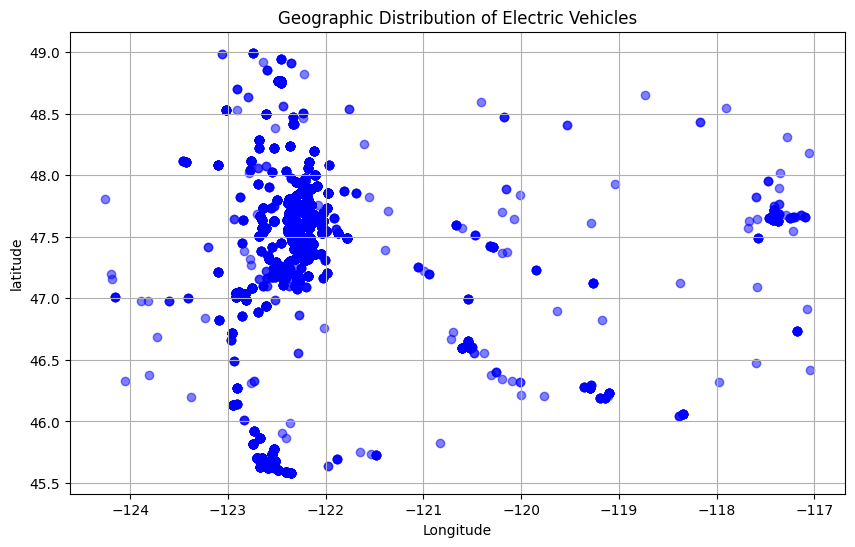

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/dinni (1).csv')

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['latitude'], marker='o', color='blue', alpha=0.5)
plt.title('Geographic Distribution of Electric Vehicles')
plt.xlabel('Longitude')
plt.ylabel('latitude')
plt.grid(True)
plt.show()


This code uses pandas and matplotlib to create a scatter plot that visualizes the geographic distribution of electric vehicles based on their longitude and latitude coordinates from a given dataset, helping to gain insights into their spatial locations.